In [64]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load the data
data = pd.read_excel('SignedPlayersDatasetVALORANT.xlsx')
data['date'] = pd.to_datetime(data['date'])
# Fix name errors
data = data.replace('\n','', regex=True)
data = data.replace(' ','', regex=True)
#test_data = pd.read_excel('Test Dataset VALORANT VCT DATASET.xlsx').dropna(how='any',axis=0)
#test_data['date'] = pd.to_datetime(test_data['date'])

In [33]:
data

,date,player,rounds,rating,average_combat_score,kills_deaths,average_damage_per_round,kills_per_round,assists_per_round,first_kills_per_round,first_deaths_per_round,headshot_percentage,clutch_success_percentage,total_kills,total_deaths,total_assists,total_first_kills,total_first_deaths
0,2022-10-07,Cryocells,119,1.22,249.6,1.39,158.8,0.89,0.11,0.15,0.06,0.24,0.06,106,76,13,18,7
1,2022-08-31,Cryocells,285,1.15,232.2,1.27,143.4,0.85,0.13,0.18,0.13,0.24,0.19,242,191,36,50,36
2,2023-02-13,Cryocells,175,1.00,219.3,1.01,137.5,0.75,0.25,0.13,0.18,0.18,0.00,131,130,54,23,32
3,2022-08-31,bang,157,1.04,192.0,1.08,129.1,0.71,0.36,0.07,0.09,0.40,0.29,112,104,56,11,14
4,2023-02-13,bang,175,0.99,200.1,0.98,134.5,0.74,0.34,0.13,0.12,0.39,0.05,129,131,59,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2022-08-31,yay,492,1.26,254.6,1.50,159.8,0.93,0.09,0.20,0.08,0.26,0.15,460,306,42,96,40
414,2023-02-13,yay,89,1.11,201.6,1.24,127.4,0.75,0.15,0.15,0.12,0.29,0.08,67,54,13,13,11
415,2022-10-04,hoody,128,1.11,242.8,1.08,155.6,0.82,0.30,0.12,0.08,0.30,0.18,105,97,38,15,10
416,2023-02-13,hoody,97,0.96,189.0,0.94,135.4,0.63,0.16,0.06,0.08,0.23,0.20,61,65,16,6,8


In [34]:
# Select features and target variable
features = ['kills_per_round', 'assists_per_round', 'average_damage_per_round',
            'first_kills_per_round', 'first_deaths_per_round', 'headshot_percentage',
            'clutch_success_percentage', 'total_kills', 'total_deaths', 'total_assists',
            'total_first_kills', 'total_first_deaths']

target_variable = 'average_combat_score'

In [1]:
#Old Split
'''
X_train = data[features]
X_test = test_data[features]
y_train = data[target_variable]
y_test = test_data[target_variable]
'''
None

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=42)

In [37]:
# Initialize the XGBoost Regressor
model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [38]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test.to_numpy())

In [40]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 32.38491847406828


In [11]:
#With Hyperparameter tuning

In [12]:
#Create model pipeline
from sklearn.pipeline import Pipeline

estimators = [
    ('clf', XGBRegressor(objective='reg:squarederror', random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)

Pipeline(steps=[('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                            

In [13]:
#Set up hyperparameter tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=100, scoring='neg_mean_squared_error', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [14]:
#Train opt

In [15]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBRegressor(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                

In [16]:
#Evaluate the model and make predictions

In [17]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=1.0, colsample_bynode=1.0,
                              colsample_bytree=0.9541740370843765,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=3.9257812127817533,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.11391901252779493, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=10

In [18]:
y_pred = opt.predict(X_test.to_numpy())

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 29.449433682061105


In [20]:
#Measure feature importance 

In [21]:
opt.best_estimator_.steps

[('clf',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=1.0, colsample_bynode=1.0,
               colsample_bytree=0.9541740370843765, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=3.9257812127817533, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.11391901252779493, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=8, ...))]

In [22]:
#Save Models

filename1 = 'model.sav'
filename2 = 'model w tuning.sav'

In [23]:
pickle.dump(model, open(filename1, 'wb'))

In [24]:
xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]

pickle.dump(xgboost_model, open(filename2, 'wb'))

In [25]:
#Load Model

model = pickle.load(open(filename1, 'rb'))
opt = pickle.load(open(filename2, 'rb'))

In [26]:
# Evaluate the model
y_pred = opt.predict(X_test.to_numpy())
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 29.449433682061105


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

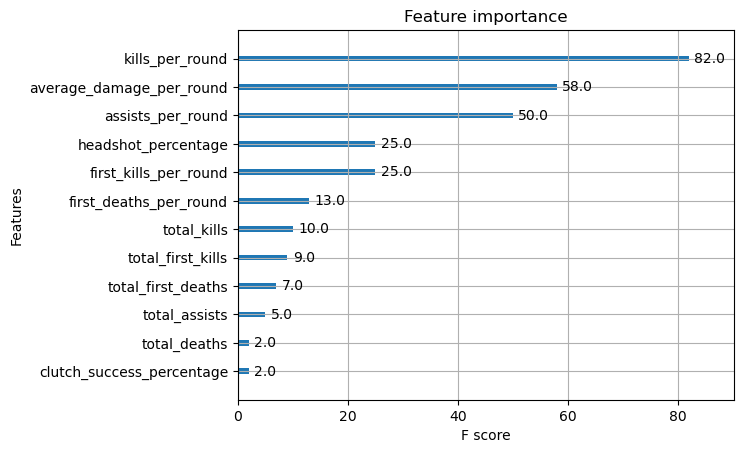

In [27]:
plot_importance(opt)

In [ ]:
#Predict and analyze models

In [58]:
predictions = model.predict(X_test)
predictions_optimized = opt.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, predictions_optimized)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 29.449433682061105


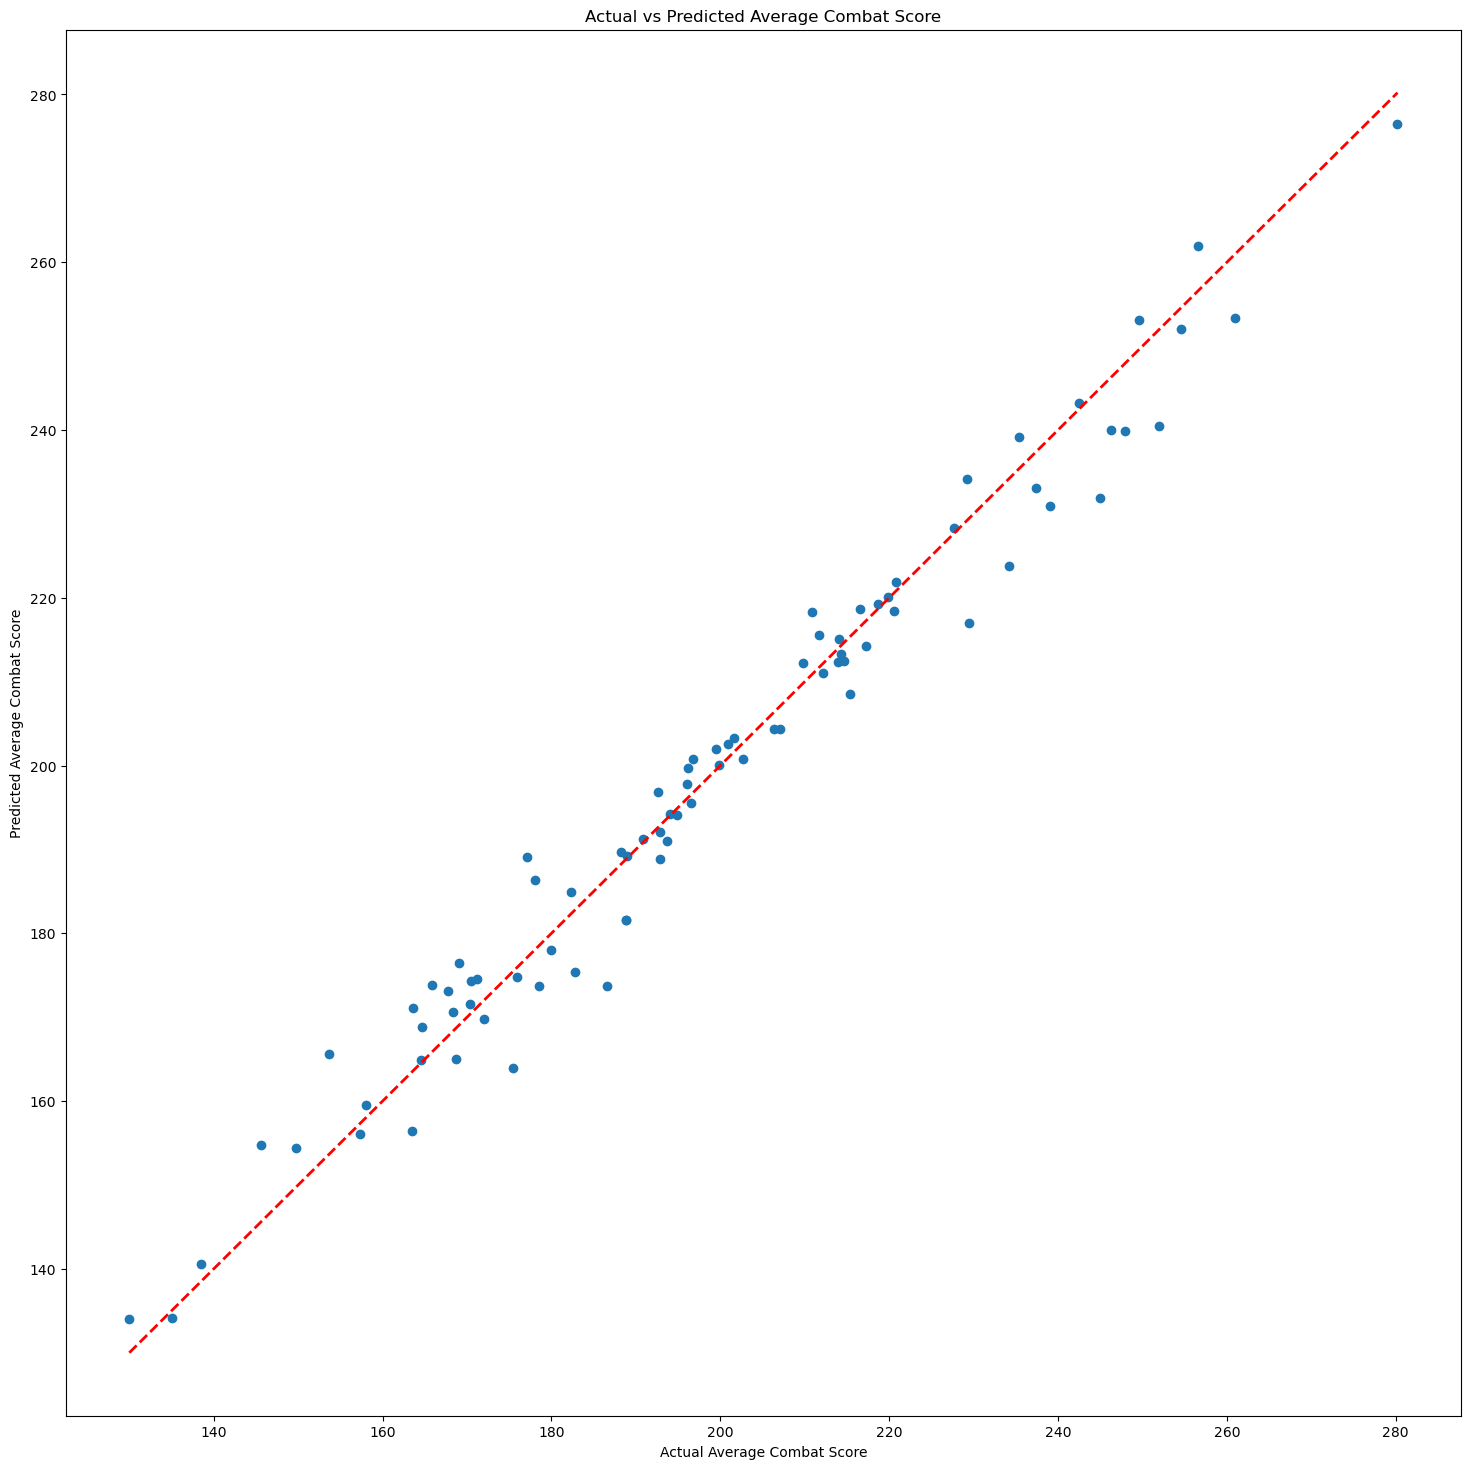

In [57]:
# Actual vs Predicted graph

# Create a larger figure
plt.figure(figsize=(18, 18))

# Plot actual vs predicted values with player names
plt.scatter(y_test, predictions_optimized)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Average Combat Score")
plt.ylabel("Predicted Average Combat Score")
plt.title("Actual vs Predicted Average Combat Score")

plt.show()

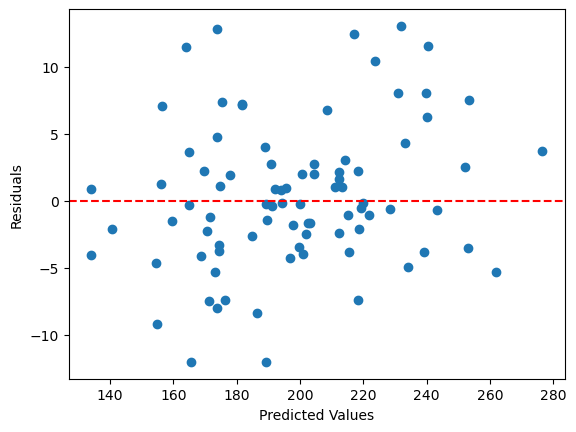

In [62]:
#Residual Plot
residuals = y_test - predictions_optimized
plt.scatter(predictions_optimized, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Text(0, 0.5, 'Frequency')

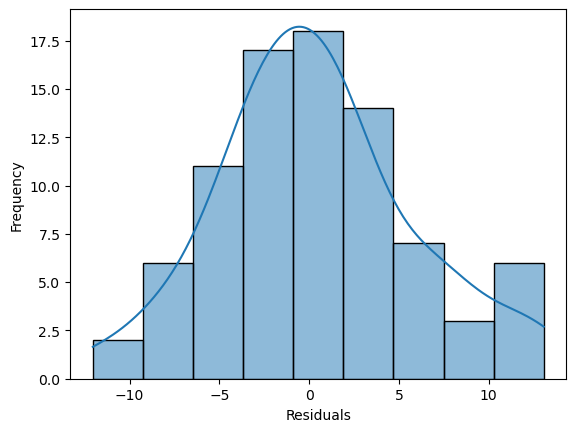

In [65]:
#Distribution of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')

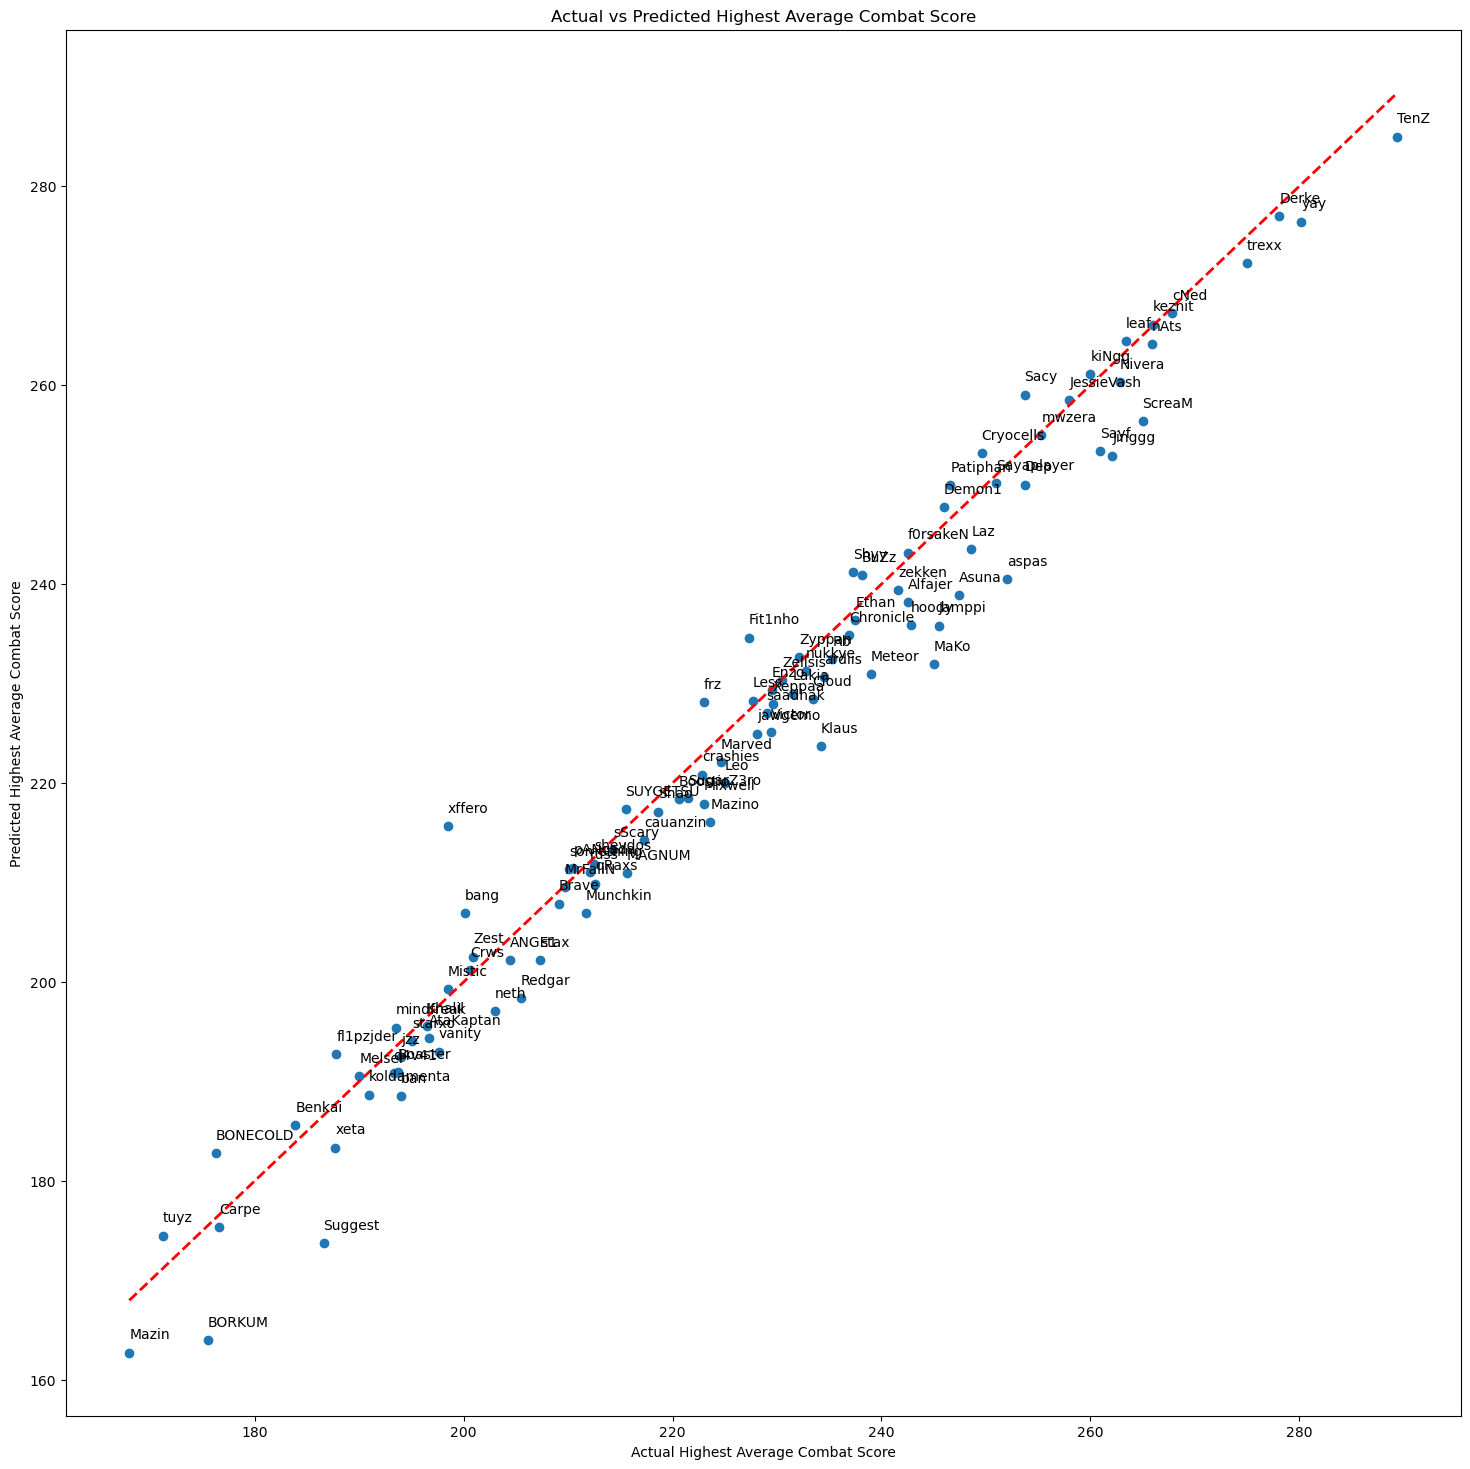

In [56]:
# Actual vs Predicted graph player's highest ACS

df_model_predict = data.assign(predictions = opt.predict(data[features]))
df_only_first = df_model_predict.sort_values('average_combat_score', ascending=False).drop_duplicates(subset='player', keep='first')

actual = df_only_first['average_combat_score']
high_predictions = df_only_first['predictions']

# Create a larger figure
plt.figure(figsize=(18, 18))

# Plot actual vs predicted values with player names
plt.scatter(actual, high_predictions)
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Highest Average Combat Score")
plt.ylabel("Predicted Highest Average Combat Score")
plt.title("Actual vs Predicted Highest Average Combat Score")

# Display player names with a larger offset
for row in df_only_first.itertuples():
    # Add a larger offset to player names
    offset = 10  # Adjust this value based on your preference
    plt.annotate(row.player, (row.average_combat_score, row.predictions), textcoords="offset points", xytext=(0, offset))

# Show the larger plot
plt.show()